[SOFTEX] Residência em TIC - MCTI Futuro - IFMA 

# 3. - Ciência de Dados com Python
## 3.4 - Preparação de Dados (parte I): Tratamento de dados ausentes

Este notebook é parte do material do Curso de Treinamento em IA criado pelo IFMA/DComp e financiado pelo SOFTEX, 2023.

Elaborado por Prof. Josenildo Silva (jcsilva@ifma.edu.br)

### Fonte
Este notebook é uma tradução livremente adaptada do original em inglês

- "A Guide to Handle Missing Data with Python" by Parul Pandey, at Kaggle
- https://www.kaggle.com/code/parulpandey/a-guide-to-handling-missing-values-in-python/notebook
    

### Por quê dados desaparecem?    
- Não há o que registrar
- Problemas na coleta devido a erro humano, sensores defeituosos, procedimentos errados
- Remoção acidental

### O que se pode fazer? tratamento
<img src="missing-data.png" alt="Dados Ausentes" width="900"/>



# Dados

* 1. [Titanic Dataset](https://www.kaggle.com/c/titanic) par tratamento com dados tabulares
* 2. [Air Quality Data in India (2015 - 2020)](https://www.kaggle.com/rohanrao/air-quality-data-in-india) para tratamento com séries temporais

# Bibliotecas

In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression

## Dataset tabular 
 

In [2]:
os.listdir('.'),

(['[SOFTEX] 3.4.1 - preparacao (parte I) - dados ausentes - v.2023.03.10.ipynb',
  'tests.ipynb',
  '[SOFTEX] 3.4.3 - preparacao (parte III) - tidy-data - v.2023.03.10.ipynb',
  '3.3-atividades-visualização-dados.ipynb',
  'hist.png',
  '.ipynb_checkpoints',
  '[SOFTEX] 3.3.1 - visualizacao (parte I) - matplotlib - v.2023.03.09.ipynb',
  '[SOFTEX] 3.4.2 - preparacao (parte II) - outliers e transformacao - v.2023.03.10.ipynb',
  '[SOFTEX] 3.5 - analise exploratoria - exemplo - v.2023.02.26.0155.ipynb',
  '[SOFTEX] 3.4.4 - preparacao (parte VI) - exemplo - v.2023.03.12.ipynb',
  '[SOFTEX] 3.3.2 - visualizacao (parte II) - seaborn - v.2023.03.09.ipynb',
  '3.3-atividades-visualização-dados-com-repostas.ipynb'],)

In [3]:
titanic_df = pd.read_csv('../data/raw/titanic.csv')

Alternativa: ler a partir de uma URL

In [4]:
titanic_df =pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [4]:
titanic_df.sample(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
543,544,1,2,"Beane, Mr. Edward",male,32.0,1,0,2908,26.0000,NaN,S
577,578,1,1,"Silvey, Mrs. William Baird (Alice Munger)",female,39.0,1,0,13507,55.9000,E44,S
795,796,0,2,"Otter, Mr. Richard",male,39.0,0,0,28213,13.0000,NaN,S
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.6000,C2,S
421,422,0,3,"Charters, Mr. David",male,21.0,0,0,A/5. 13032,7.7333,NaN,Q
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.2750,NaN,S
317,318,0,2,"Moraweck, Dr. Ernest",male,54.0,0,0,29011,14.0000,NaN,S
612,613,1,3,"Murphy, Miss. Margaret Jane",female,NaN,1,0,367230,15.5000,NaN,Q
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S
183,184,1,2,"Becker, Master. Richard F",male,1.0,2,1,230136,39.0000,F4,S


In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Detecção de Valores Ausentes

## Detecção numericamente 

Quantidade de valores ausentes em cada coluna

In [6]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Vamos calcular a percentagem de valores ausentes em cada coluna do dataset

In [7]:
titanic_df.isnull().sum()/len(titanic_df)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [9]:
def missing_values_table(df):
    mis_val = df.isnull().sum()                                 #Total missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)         # Percentage of missing values
    mis_val_df = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_df.rename(columns = {0 : 'Ausentes', 
                                 1 : 'Percentual'},
                      inplace=True)
    mis_val_df = mis_val_df[mis_val_df.iloc[:,1] != 0]
    mis_val_df = mis_val_df.sort_values('Percentual',
                           ascending=False).round(1)
    return mis_val_df

In [10]:
missing_values_table(titanic_df)

,Ausentes,Percentual
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2


## Detectando valores ausentes com Missingno


In [13]:
import missingno as msno

<Axes: >

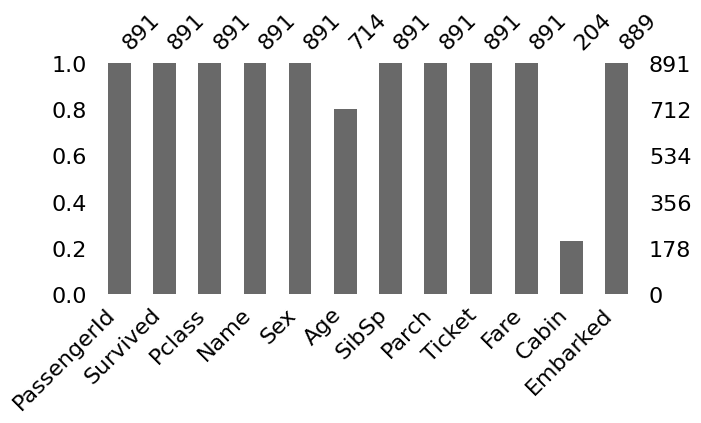

In [14]:
msno.bar(titanic_df, figsize=(7,3))

O gráfico acima mostra cada atributo e quantos valores estão presentes (not null). 
Podemos ver que Age, Cabin e Embarked possuem valores ausentes. Em seguida vamos localizar a posição destes valores ausentes.

### Visualizando as localizações de dados ausentes 

The [msno.matrix](https://github.com/ResidentMario/missingno#matrix) nullity matrix is a data-dense display which lets you quickly visually pick out patterns in data completion.


<Axes: >

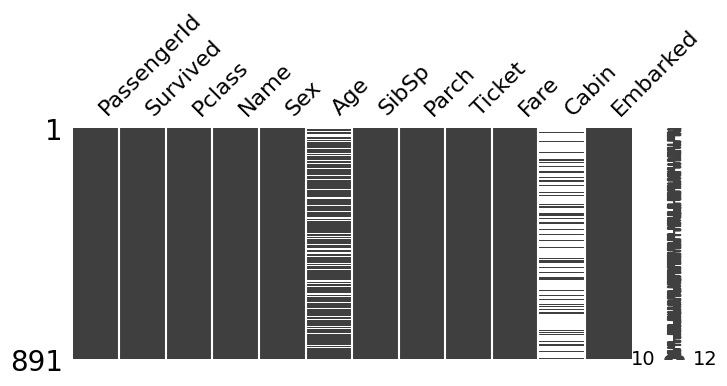

In [15]:
msno.matrix(titanic_df,figsize=(8,3))

No plot, linhas brancas indicam valores ausentes. Por exemplo, no atributo Embarked só há dois valores ausentes.


<Axes: >

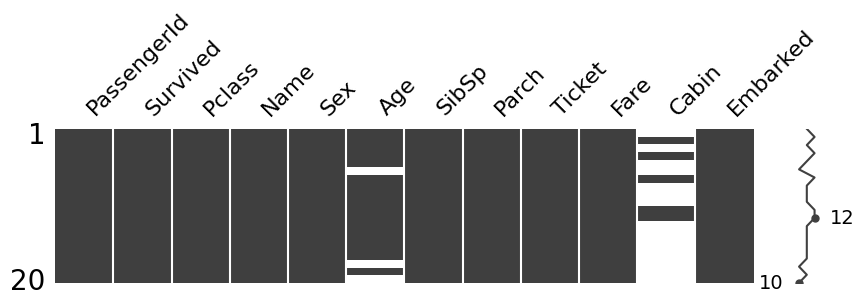

In [16]:
msno.matrix(titanic_df.head(20),figsize=(10,2))

### Encontrando razões usando matrix plot 

<Axes: >

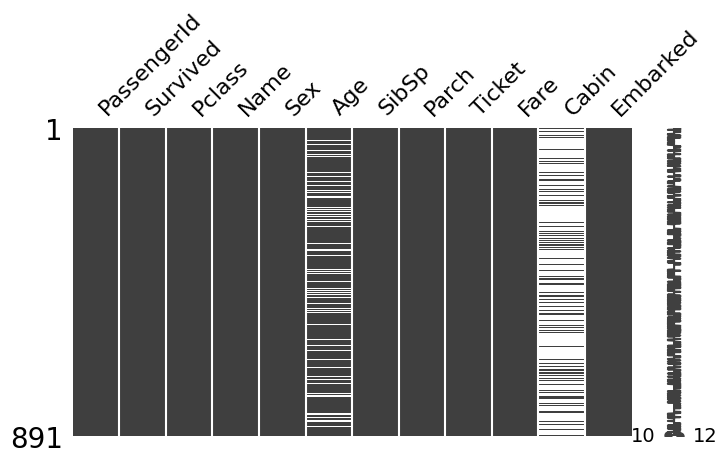

In [17]:
msno.matrix(titanic_df,figsize=(8,4))

A coluna `Embarked` possui poucos dados ausentes. Além disso, as ausências não parecem ser correlacionadas com nenhuma outra coluna. Portanto, os dados ausentes em `Embarked` devem ter ocorrido de modo aleatório.

Tanto `Age` quanto `Cabin` possuem muitos dados ausentes. Ainda assim não conseguimos observar se há relação entre a ausência nas duas colunas.

O pacote `missingno`permite ordenar uma coluna em particular. Vamos ver se alguma relação se torna aparente.

<Axes: >

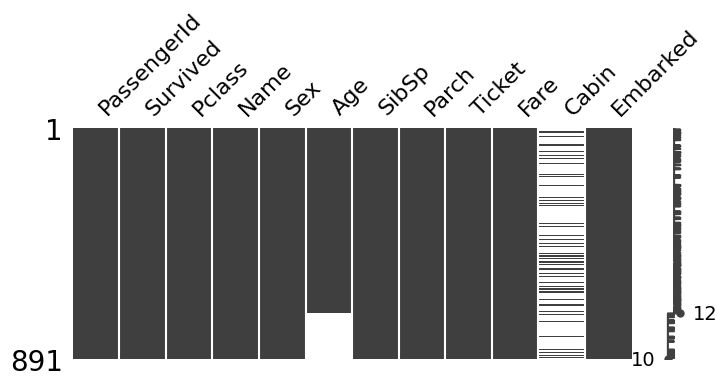

In [19]:
sorted = titanic_df.sort_values('Age')
msno.matrix(sorted,figsize=(8,3))

Fica claro que não há correlação entre nulos em `Age` e `Cabin`.

O método `nullity sort` ordena pela quantidade de nulos 

<Axes: >

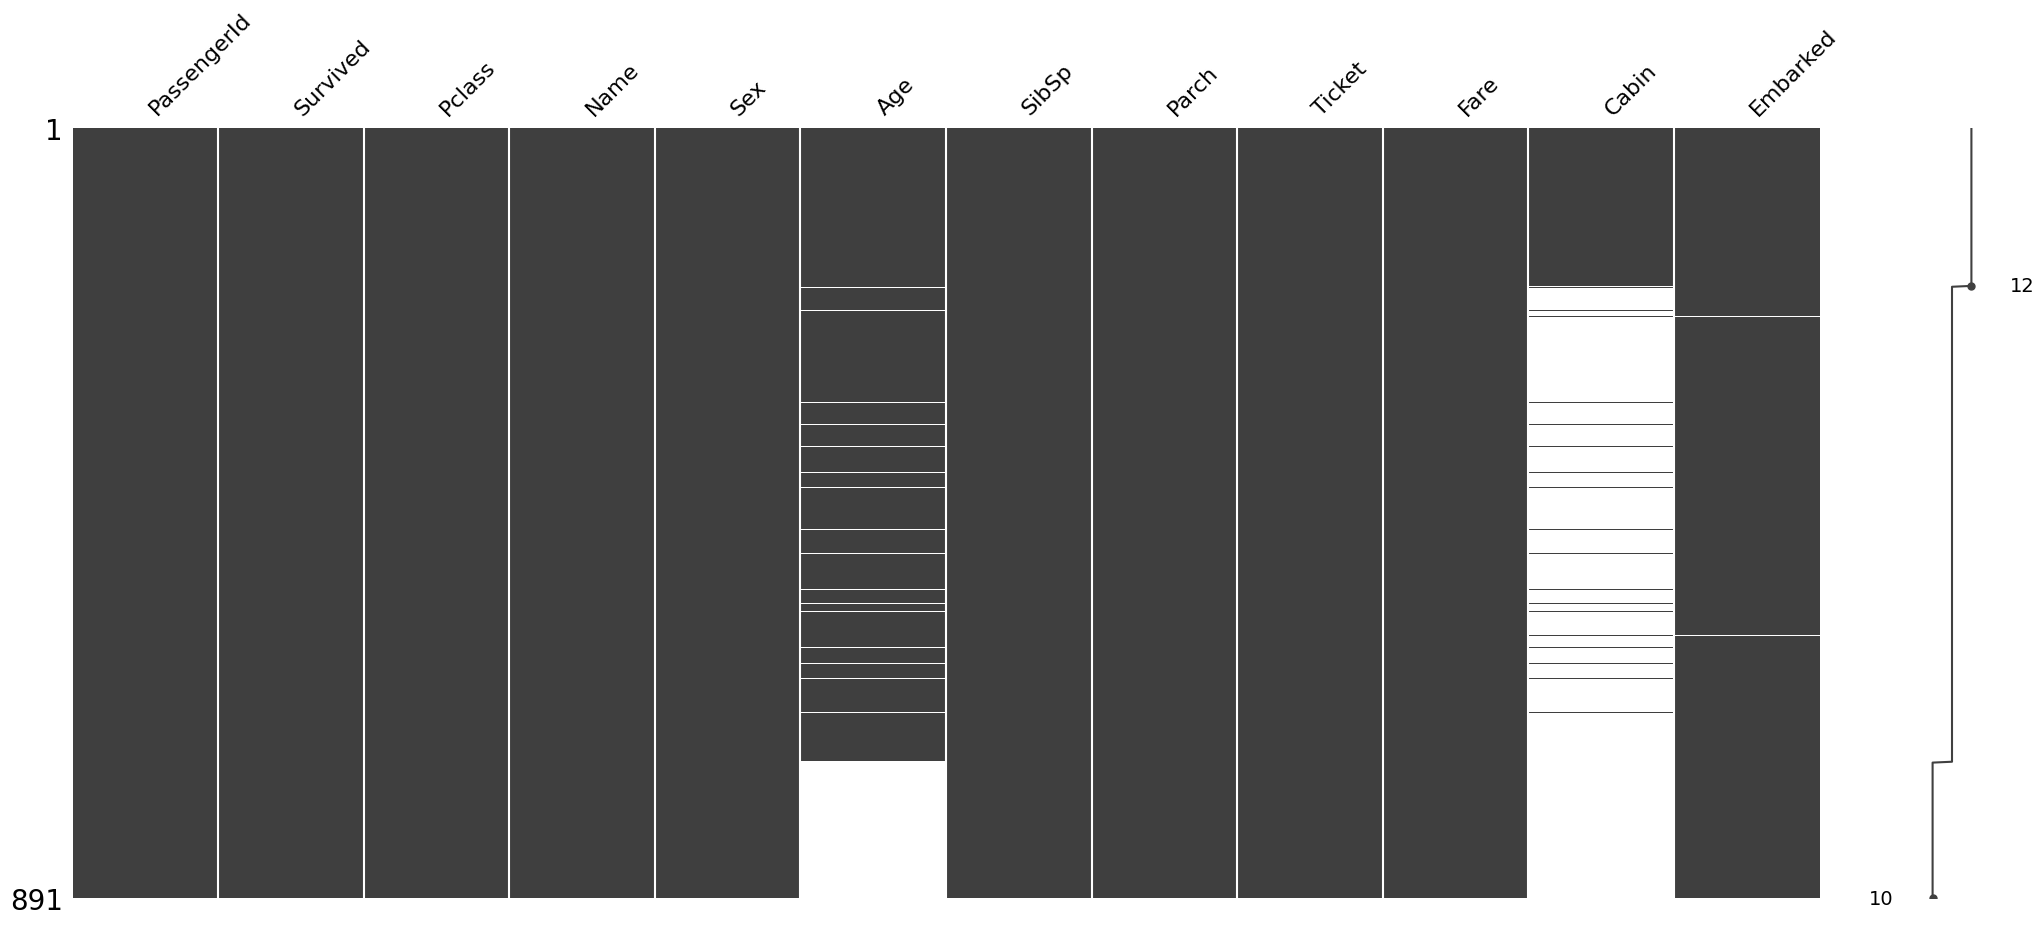

In [21]:
filtered_data = msno.nullity_sort(titanic_df, sort='descending') # or filter='top'
msno.matrix(filtered_data)

## Usando heatmap para entender os valores ausentes 

<Axes: >

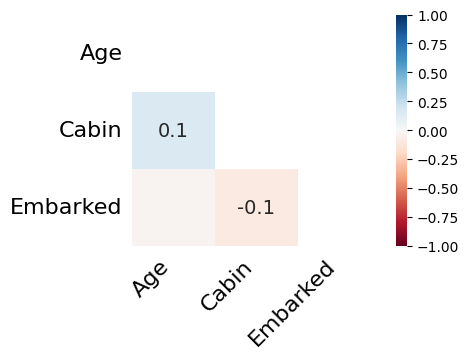

In [33]:
msno.heatmap(titanic_df,figsize=(4,3))


Este `heatmap` mostra que não há correlações fortes entre as colunas com ausência de valores.

## Usando um dendrogram para entender relação entre valores ausentes
Um dendrogram é uma árvore que agrupa variáveis correlacionadas de acordo com o grau de ausência de valores.

<Axes: >

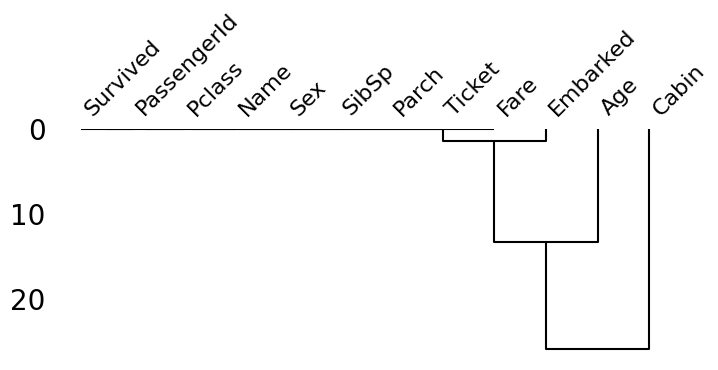

In [34]:
msno.dendrogram(titanic_df,figsize=(8,3))

Grupos de folhas na árvores que estão ligados na distancia são correlacionadas (positiva ou negativamente)

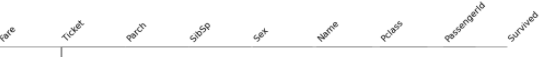


A ausência na coluna `Embarked` tende a ser mais similar `Age` do que a `Cabin`. 

## Exemplo com dataset colisions

In [35]:
collisions = pd.read_csv("https://raw.githubusercontent.com/ResidentMario/missingno-data/master/nyc_collision_factors.csv")

<Axes: >

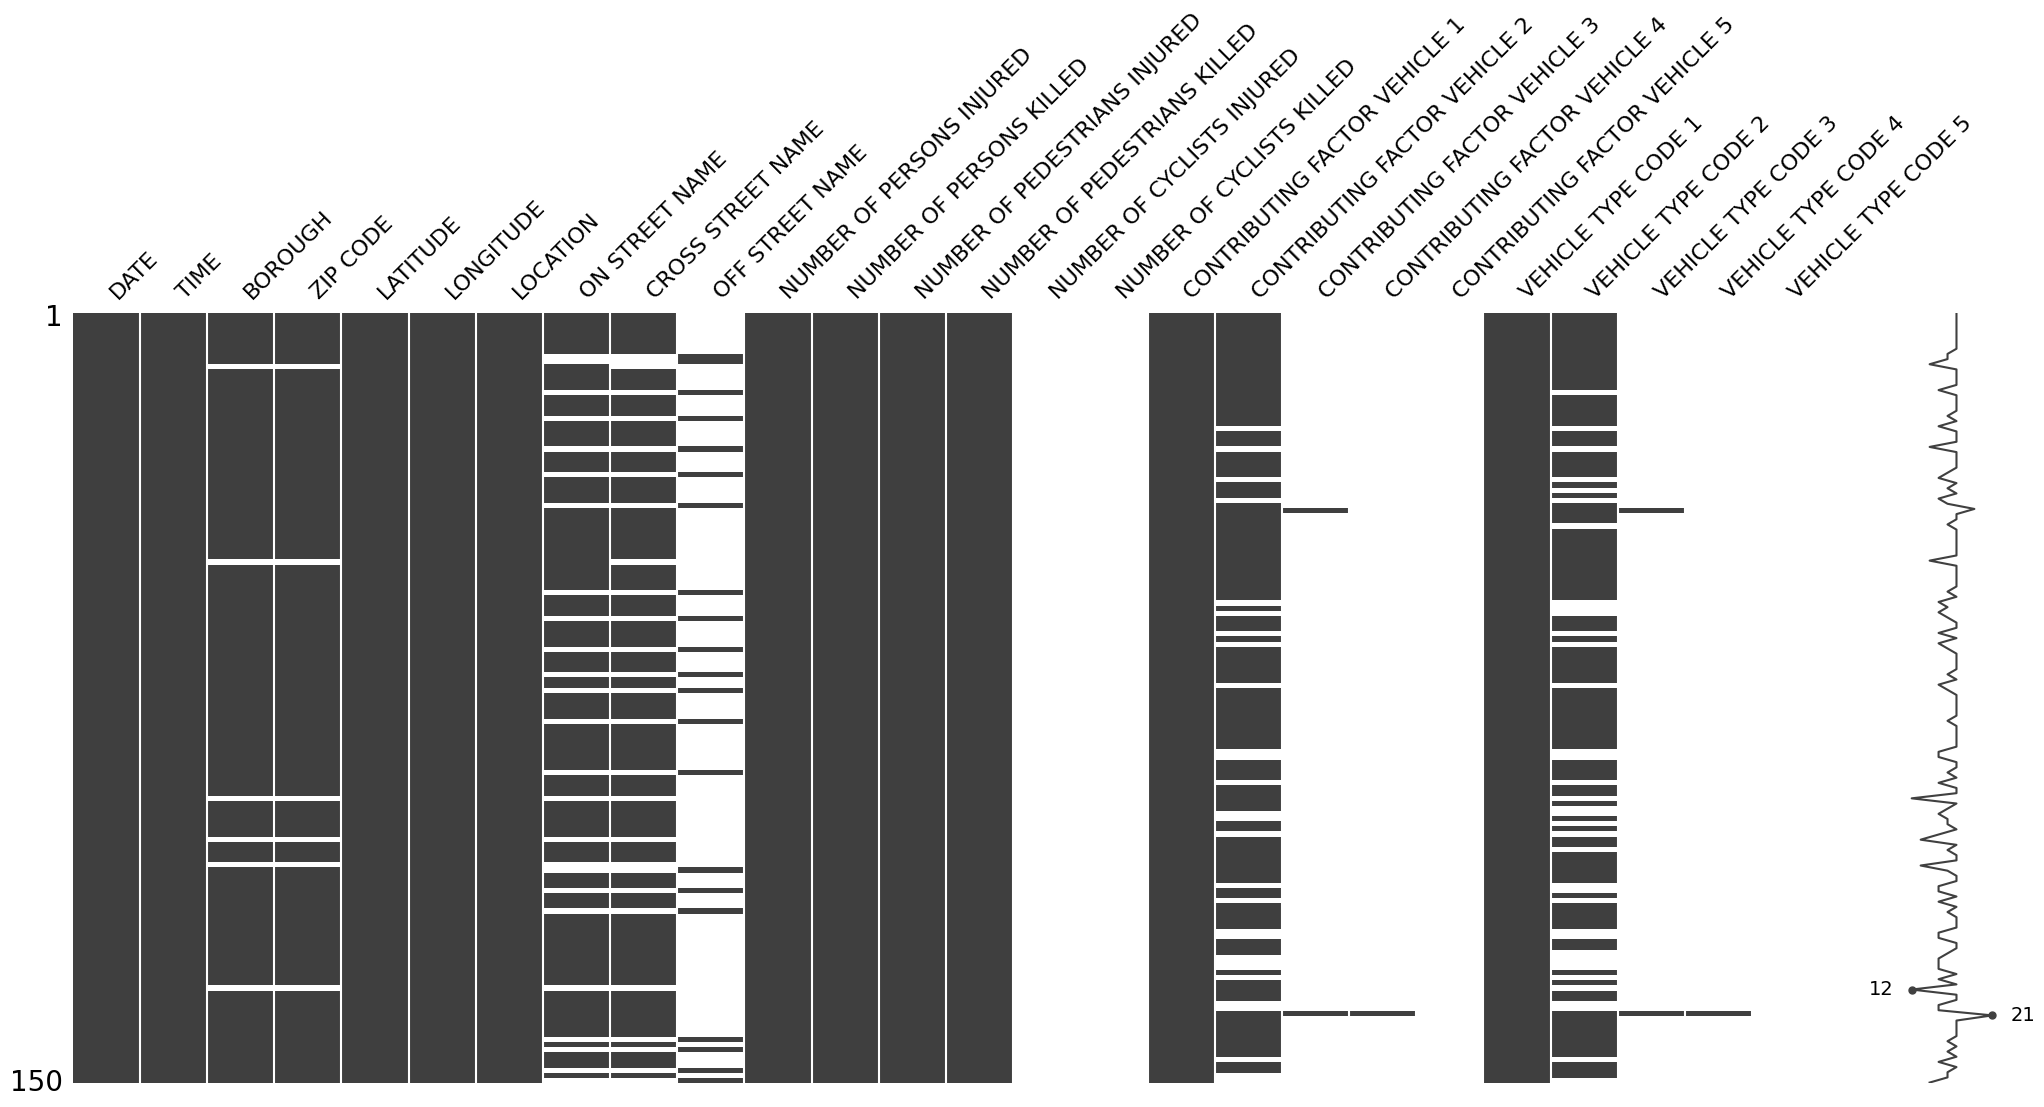

In [36]:
msno.matrix(collisions.sample(150))

<Axes: >

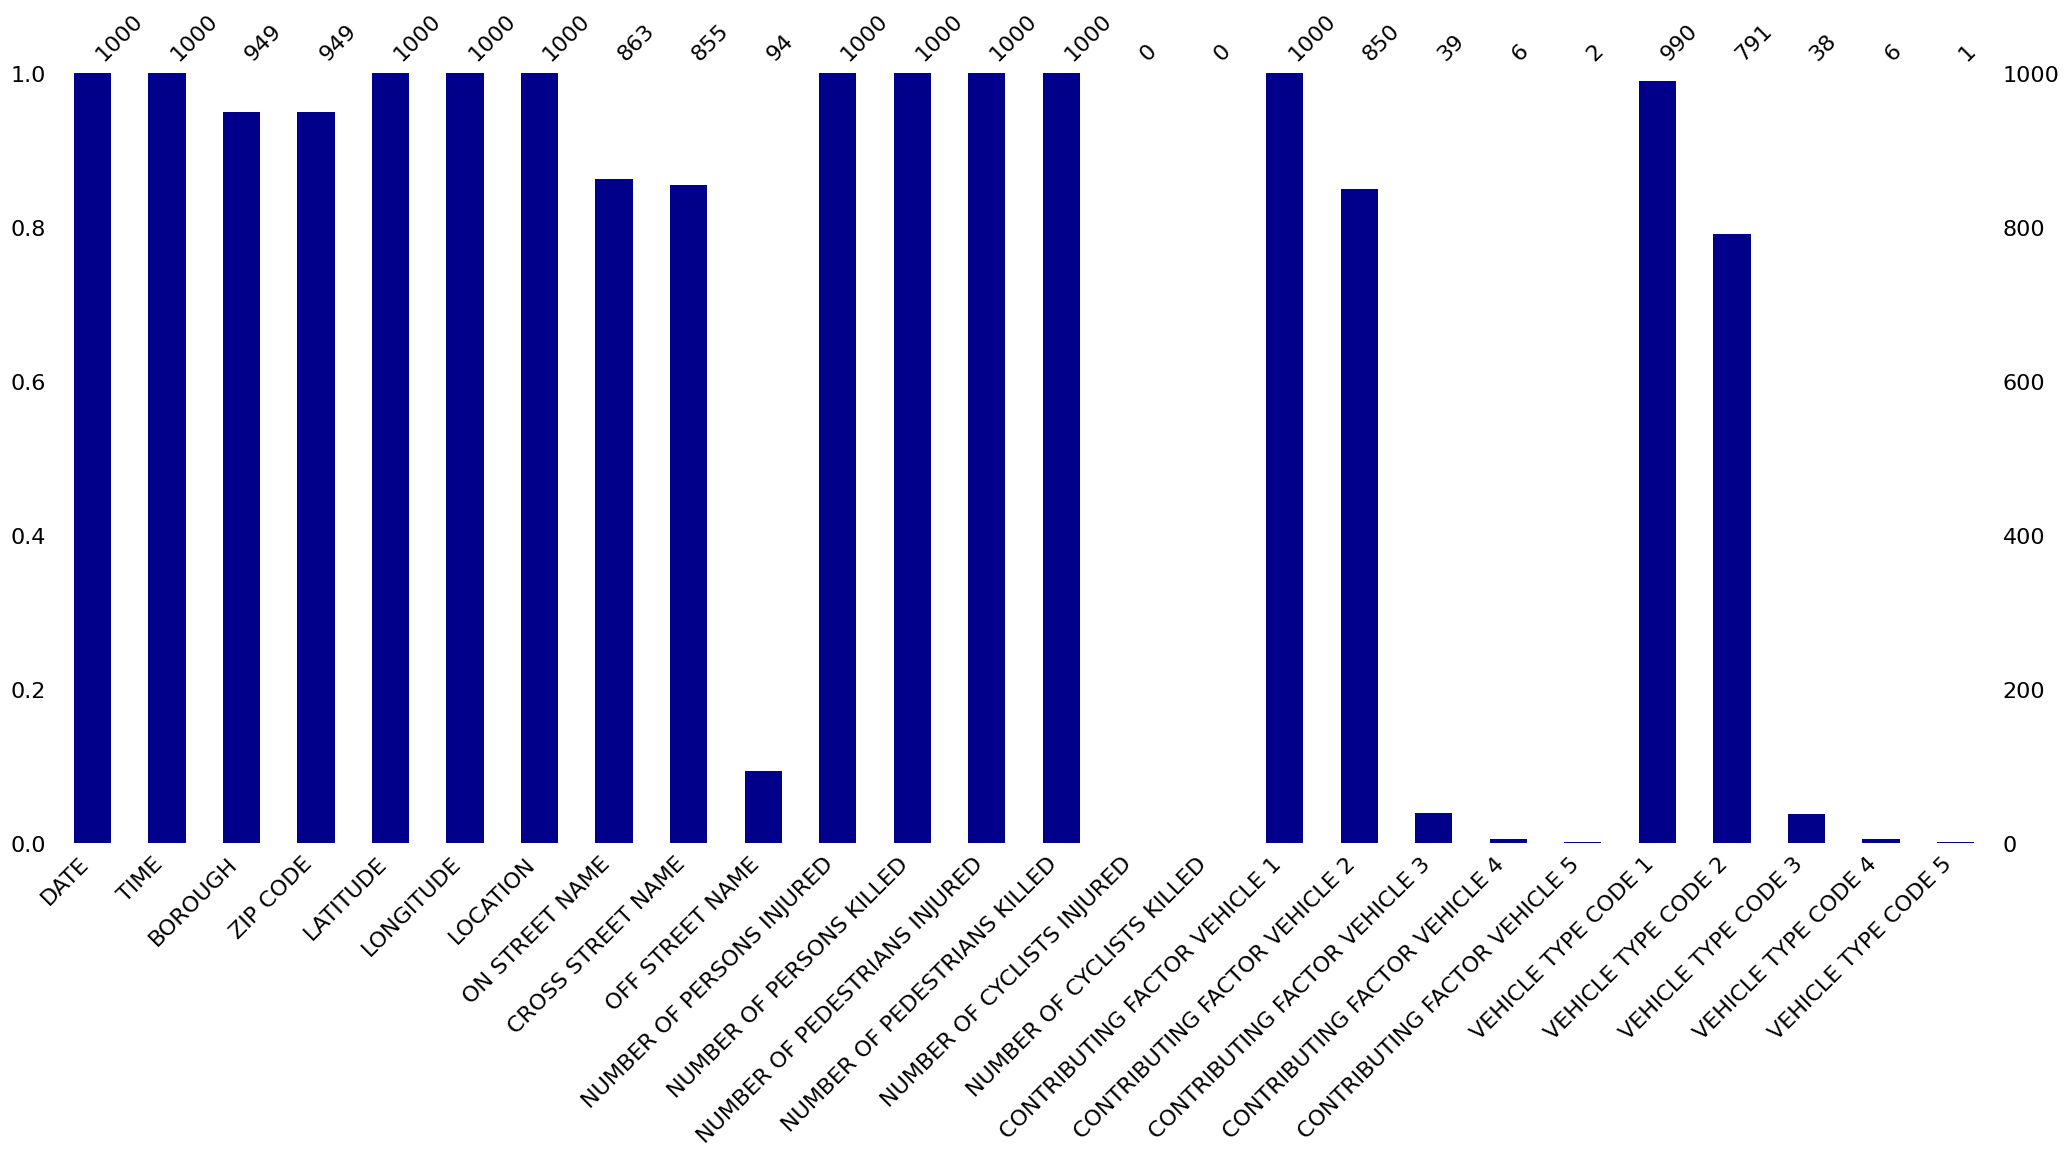

In [37]:
msno.bar(collisions.sample(1000),color='darkblue')

<Axes: >

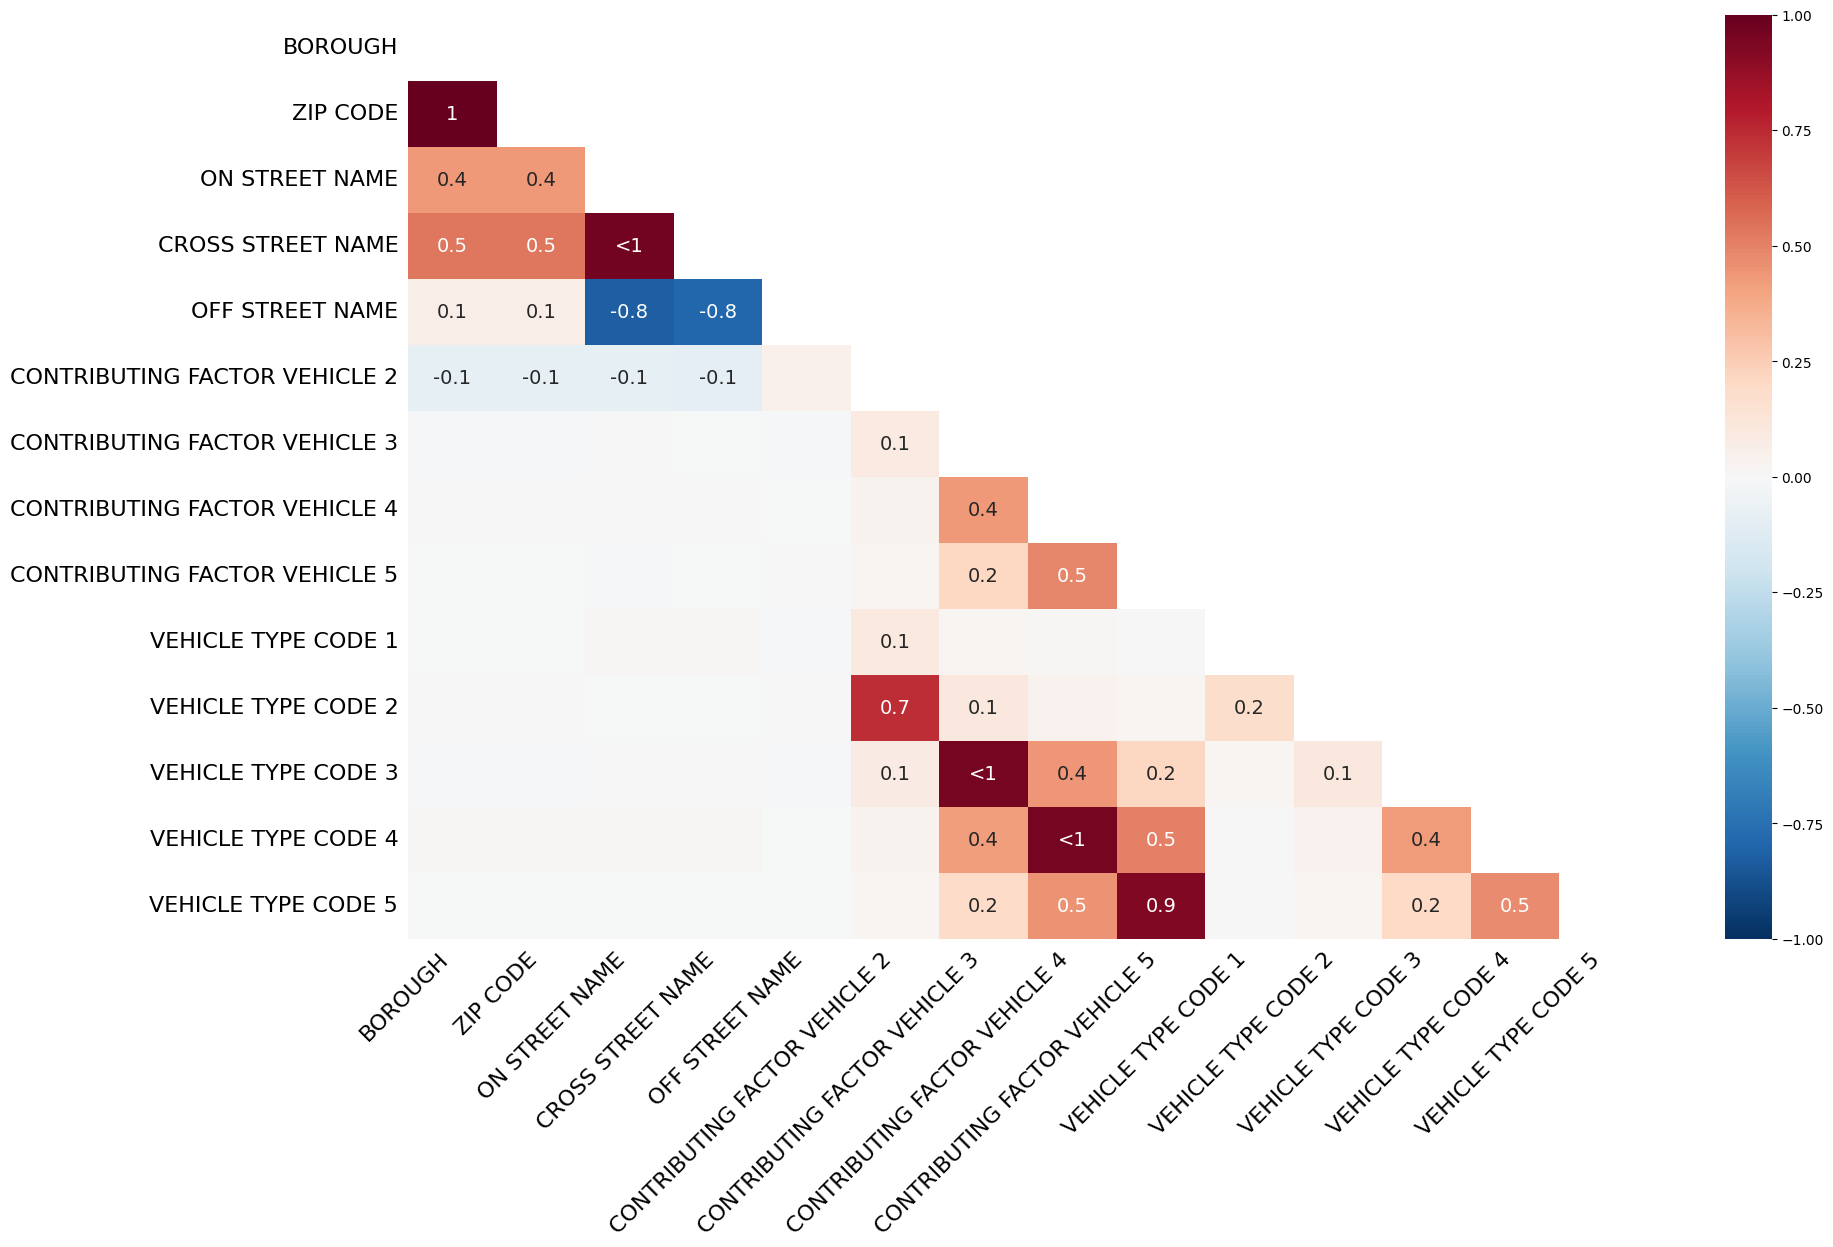

In [38]:
msno.heatmap(collisions,cmap='RdBu_r')

<AxesSubplot: >

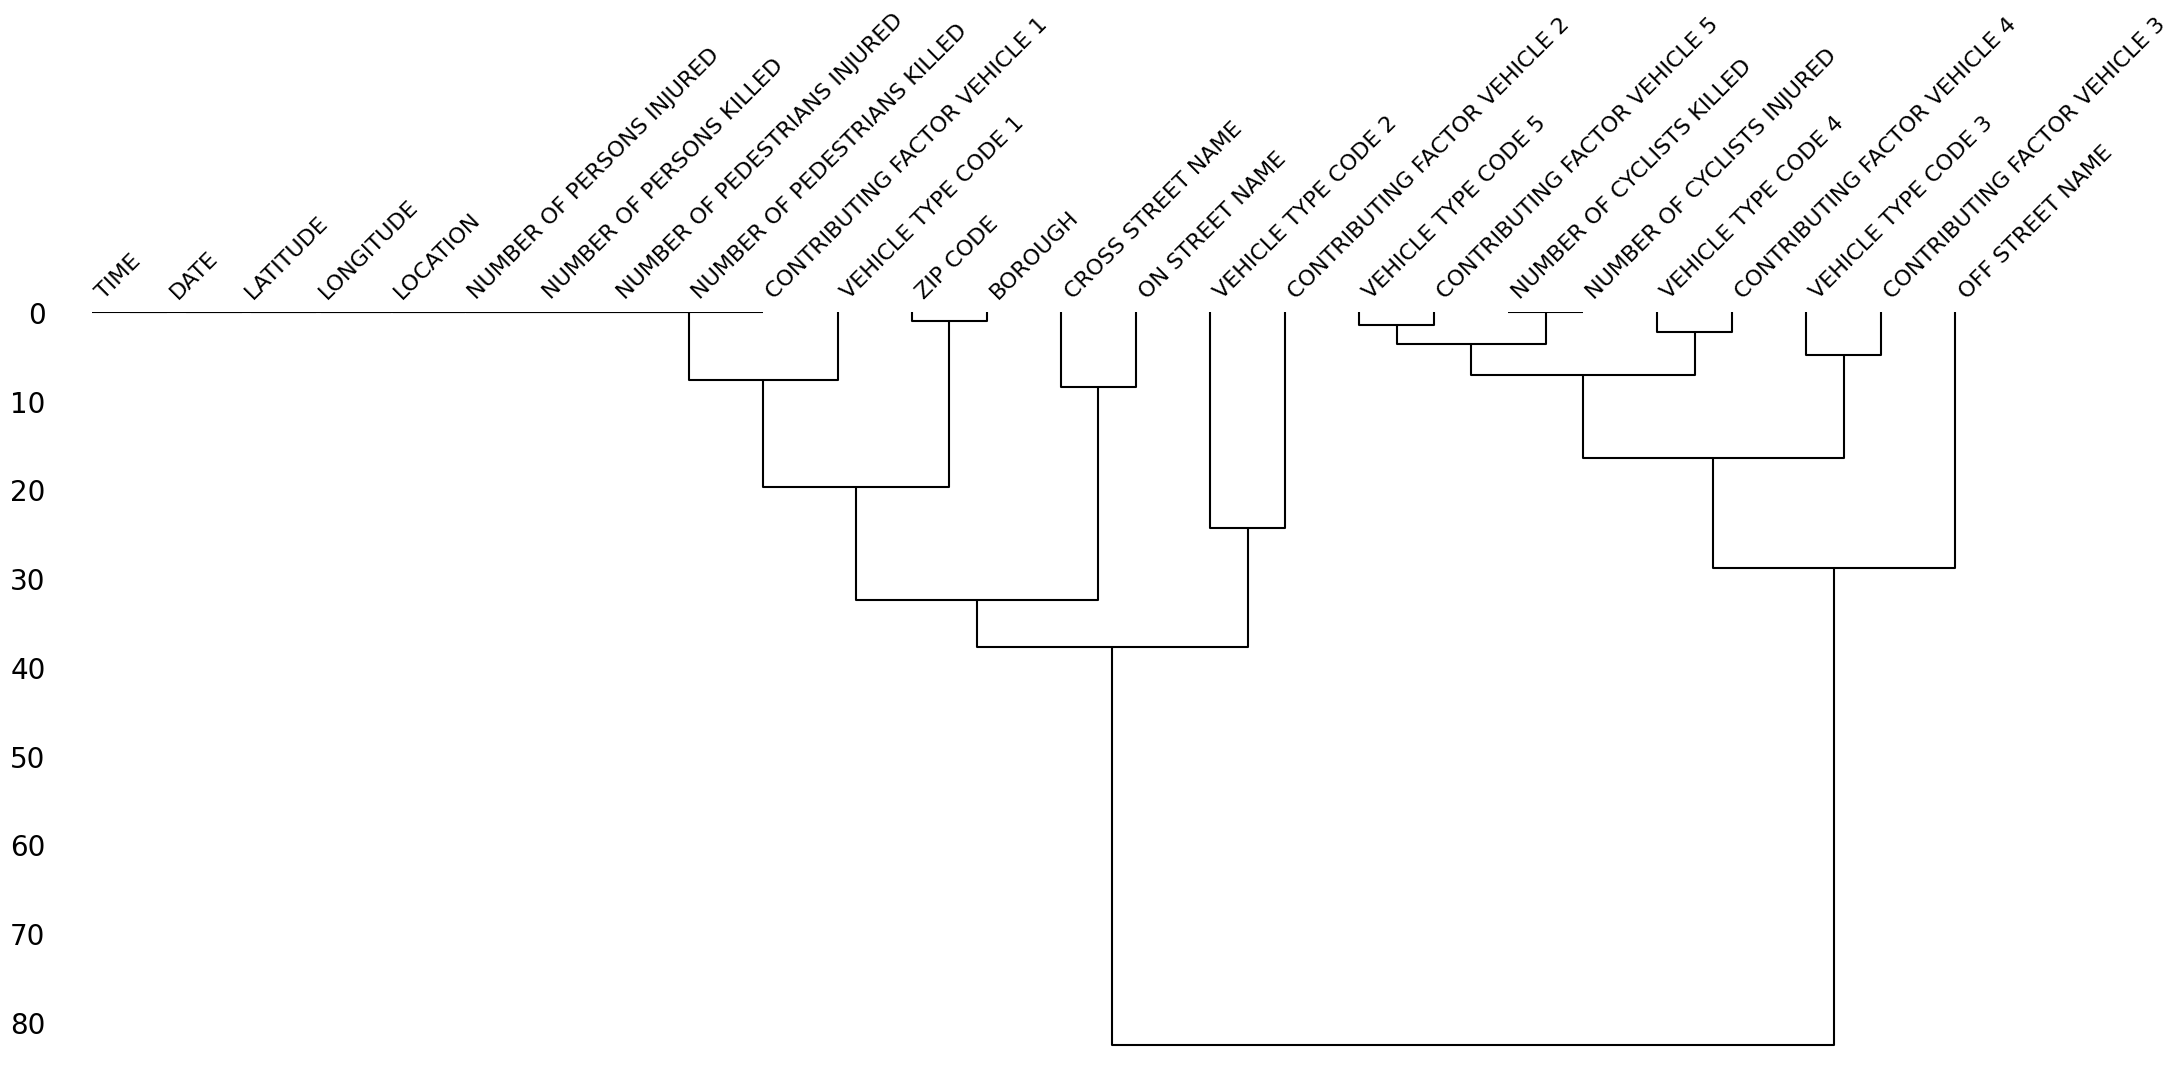

In [24]:
msno.dendrogram(collisions)

<AxesSubplot: >

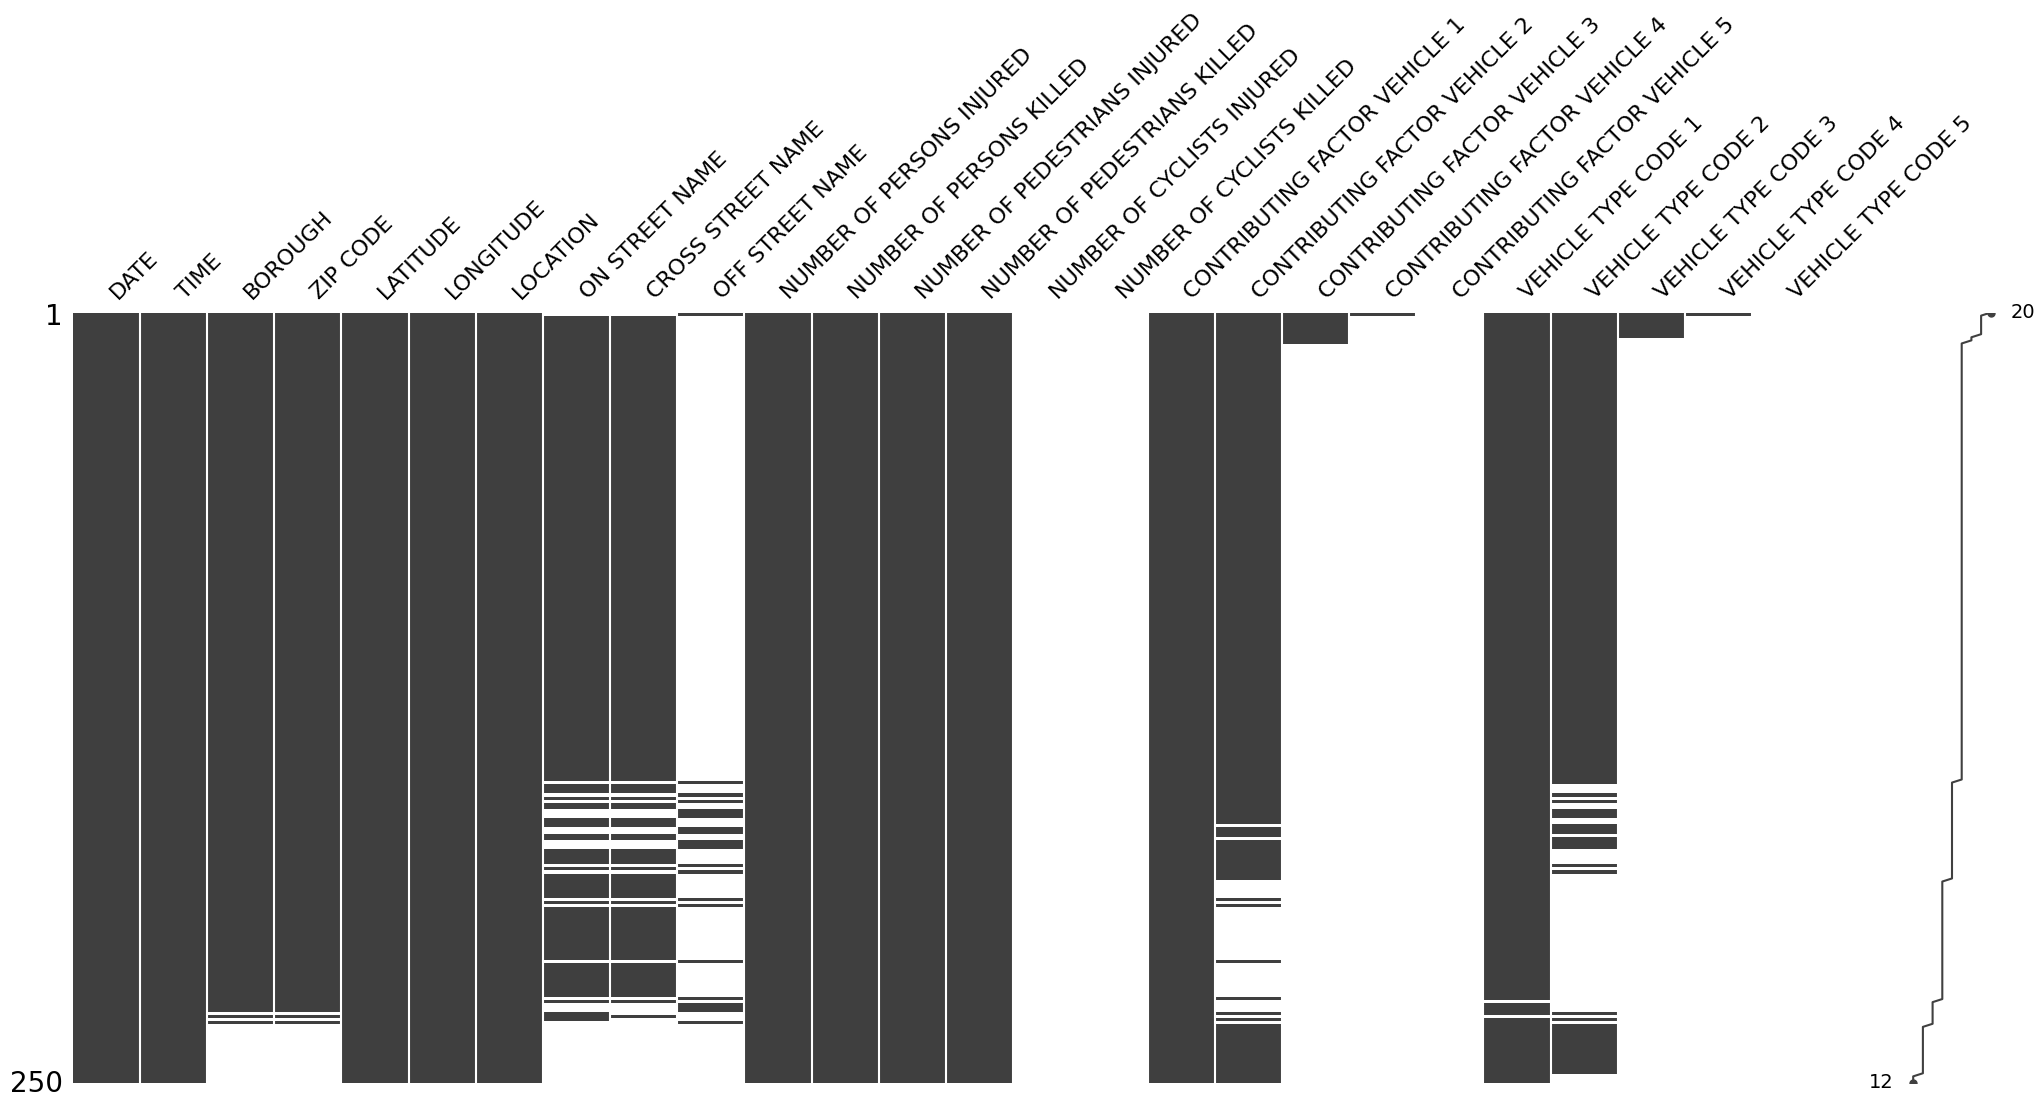

In [25]:
filtered_data = msno.nullity_sort(collisions.sample(250), sort='descending') # or filter='top'
msno.matrix(filtered_data)

# Tratamento de valores ausentes  

![](https://imgur.com/tBvdfyX.png)

Remover dados, linhas ou colunas não é recomendado pois significa perda de informação. Só considere a remoção caso a quantidade de nulos seja muito grande 

### Pairwise Deletion (ignorar nulos)

Remoção apenas do valor mantendo a tupla onde o nulo ocorre. Todas as operações do pandas operam neste modo, ignorando os valores nulos. Exemplo: `mean`,`sum`, `skew`, `kurt`, etc.

In [39]:
titanic_df.mean(numeric_only=True)

PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

In [40]:
titanic_1 = titanic_df.copy()
titanic_1['Age'].mean() #pandas ignora os valores ausentes e calcula a função mean() dos valores presentes.

29.69911764705882


### Listwise Deletion (remover linhas)

Remove uma linha se ela possui um valor nulo.

In [42]:
#Remove linhas que possuem algum NaN ou valores ausentes na coluna `Age`
titanic_1.dropna(subset=['Age'],how='any',inplace=True)
titanic_1['Age'].isnull().sum()

0

Agora a coluna `Age` não possui NaN. A maior desvantagem deste método é que ele perde mais informações. Portanto, só utilize esse método quando poucas linhas possuem valores ausentes.


### Remover colunas

Caso uma coluna possua muitos valores ausentes, por exemplo mais que 80%, esta coluna não contribui para a análise. Faça isso com cuidado.


In [43]:
ausentes = titanic_1.isnull().sum()/len(titanic_1)
print(ausentes)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.740896
Embarked       0.002801
dtype: float64


In [44]:
cols_remover = ausentes[ausentes > 0.7].index.to_list()
titanic_1.drop(cols_remover,axis=1,inplace=True)

In [45]:
titanic_1.isnull().sum()/len(titanic_1)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.002801
dtype: float64

## Técnicas de Imputação para dados tabulares 

![](https://imgur.com/bL0iHde.png)

### Técnicas básicas de imputação de dados
Imputação significa substituir valores ausentes por outros valores. Há várias opções à disposição do analista:
 - valor constante
 - baseado em estatística (media, mediana, ou mais frequente)

#### fillna()

In [46]:
titanic_2 = titanic_df.copy()
titanic_2.fillna('missing',inplace=True)
titanic_2[['Age','Fare','Cabin','Embarked']]

,Age,Fare,Cabin,Embarked
0,22.0,7.2500,missing,S
1,38.0,71.2833,C85,C
2,26.0,7.9250,missing,S
3,35.0,53.1000,C123,S
4,35.0,8.0500,missing,S
...,...,...,...,...
886,27.0,13.0000,missing,S
887,19.0,30.0000,B42,S
888,missing,23.4500,missing,S
889,26.0,30.0000,C148,C


```
df.fillna( value, method, axis, inplace)

    value : scalar, dict, Series, or DataFrame
    method : {'backfill', 'bfill', 'pad', 'ffill', None}, default None
    axis : {0 or 'index', 1 or 'columns'}
    inplace : bool, default False

```

Usando fillna com média

In [48]:
titanic_3 = titanic_df.copy()
m_age = titanic_df['Age'].mean()
titanic_3['Age'].fillna(m_age,inplace=True)
titanic_3[['Age','Fare','Cabin','Embarked']]

,Age,Fare,Cabin,Embarked
0,22.000000,7.2500,NaN,S
1,38.000000,71.2833,C85,C
2,26.000000,7.9250,NaN,S
3,35.000000,53.1000,C123,S
4,35.000000,8.0500,NaN,S
...,...,...,...,...
886,27.000000,13.0000,NaN,S
887,19.000000,30.0000,B42,S
888,29.699118,23.4500,NaN,S
889,26.000000,30.0000,C148,C


In [49]:
titanic_3.isnull().sum()/len(titanic_3)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

Usando mode() junto com fillna()

In [50]:
titanic_df['Cabin'].value_counts()[:4]

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
Name: count, dtype: int64

In [51]:
titanic_df['Cabin'].mode() # empate, os três valores tem 4 ocorrencias

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object

In [53]:
titanic_4 = titanic_df.copy()
m_cabin = titanic_df['Cabin'].mode()[0]
titanic_4['Cabin'].fillna(m_cabin,inplace=True)
titanic_4[['Age','Fare','Cabin','Embarked']]

,Age,Fare,Cabin,Embarked
0,22.0,7.2500,B96 B98,S
1,38.0,71.2833,C85,C
2,26.0,7.9250,B96 B98,S
3,35.0,53.1000,C123,S
4,35.0,8.0500,B96 B98,S
...,...,...,...,...
886,27.0,13.0000,B96 B98,S
887,19.0,30.0000,B42,S
888,NaN,23.4500,B96 B98,S
889,26.0,30.0000,C148,C


#### SimpleImputer do sklearn

In [54]:
from sklearn.impute import SimpleImputer

In [57]:
titanic_5 = titanic_df.copy()
const_imputer = SimpleImputer(strategy='constant')
titanic_5.iloc[:,:]= const_imputer.fit_transform(titanic_5)
titanic_5[['Age','Fare','Cabin','Embarked']].sample(5)

,Age,Fare,Cabin,Embarked
295,missing_value,27.7208,missing_value,C
368,missing_value,7.7500,missing_value,Q
864,24.0,13.0000,missing_value,S
853,16.0,39.4000,D28,S
791,16.0,26.0000,missing_value,S


In [61]:
titanic_6 = titanic_df.copy()
freq_imputer = SimpleImputer(strategy='most_frequent')
titanic_6.iloc[:,:] = freq_imputer.fit_transform(titanic_6)
titanic_6[['Age','Fare','Cabin','Embarked']].tail()

,Age,Fare,Cabin,Embarked
886,27.0,13.00,B96 B98,S
887,19.0,30.00,B42,S
888,24.0,23.45,B96 B98,S
889,26.0,30.00,C148,C
890,32.0,7.75,B96 B98,Q


In [62]:
titanic_6.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## Técnicas de imputação para séries temporais

Dados ausentes em séries temporais é diferente do que ocorre em dados tabulares. 

* Técnicas básicas de imputação:
  - 'ffill' or 'pad' - substitui NaN pelo ultimo valor observado
  - 'bfill' or 'backfill' - substitui NaN pelo próximo valor observado
  -  método de interpolação linear

### Dataset de séries temporais

Vamos trabalhar com o dataset [Air Quality Data in India (2015 - 2020)](https://www.kaggle.com/rohanrao/air-quality-data-in-india). Ele contem dados sobre a qualidade do ar e o indice de qualidade do ar (IQA) em intervalos de 1h e 1 dia coletados em diversas estações espalhadas por várias cidades da Índia. O dataset apresenta vários valores ausentes.

In [64]:
os.listdir('../data/raw/air-quality-data-in-india')

['city_day.csv', 'station_hour.csv', 'station_day.csv', 'city_hour.csv']

Para maiores detalhes sobre este dataset veja o Kernel [😷 Breathe India: COVID-19 effect on Pollution](https://www.kaggle.com/parulpandey/breathe-india-covid-19-effect-on-pollution). 

Vamos focar no dataset `city_day`

In [65]:
city_day = pd.read_csv('../data/raw/air-quality-data-in-india/city_day.csv',parse_dates=True,index_col='Date')
city_day1= city_day.copy(deep=True)
city_day.sample(n=10)

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
Date,,,,,,,,,,,,,,,
2015-07-18,Bengaluru,19.24,NaN,3.78,8.46,7.12,11.23,18.69,3.98,10.27,NaN,NaN,NaN,156.0,Moderate
2018-08-18,Brajrajnagar,29.74,42.93,8.33,7.62,15.93,3.95,0.00,12.86,5.33,0.69,NaN,NaN,54.0,Satisfactory
2017-10-11,Gurugram,83.88,NaN,4.93,24.58,18.43,NaN,0.73,5.42,21.74,0.03,4.43,NaN,176.0,Moderate
2020-01-31,Chennai,36.56,53.23,9.01,14.02,18.27,46.62,1.09,9.02,32.79,0.00,0.00,NaN,78.0,Satisfactory
2019-06-13,Amritsar,40.12,96.78,15.33,11.14,18.00,14.48,0.55,15.21,30.70,3.24,1.82,6.81,101.0,Moderate
2020-03-27,Bengaluru,27.47,51.79,3.22,9.44,11.22,11.09,0.85,6.49,35.60,0.14,0.37,NaN,67.0,Satisfactory
2020-05-16,Visakhapatnam,2.00,17.99,1.29,10.24,6.11,9.48,0.11,8.86,19.75,0.73,1.80,0.41,32.0,Good
2016-02-03,Delhi,136.87,273.78,18.78,61.81,80.60,30.46,1.11,24.23,95.15,4.51,8.58,NaN,306.0,Very Poor
2017-11-21,Mumbai,NaN,NaN,NaN,NaN,21.73,NaN,0.00,NaN,NaN,0.00,0.00,0.00,NaN,NaN


In [66]:
#Missing Values
city_day_missing= missing_values_table(city_day)
city_day_missing.sort_values(by='Percentual',ascending=False).T

,Xylene,PM10,NH3,Toluene,Benzene,AQI,AQI_Bucket,PM2.5,NOx,O3,SO2,NO2,NO,CO
Ausentes,16989.0,11005.0,10121.0,7715.0,5386.0,4575.0,4575.0,4552.0,4142.0,3888.0,3798.0,3465.0,3459.0,2020.0
Percentual,60.3,39.1,35.9,27.4,19.1,16.2,16.2,16.2,14.7,13.8,13.5,12.3,12.3,7.2


`Xylene` e `PM10` são as colunas com maior número de valores ausentes. 



<Axes: >

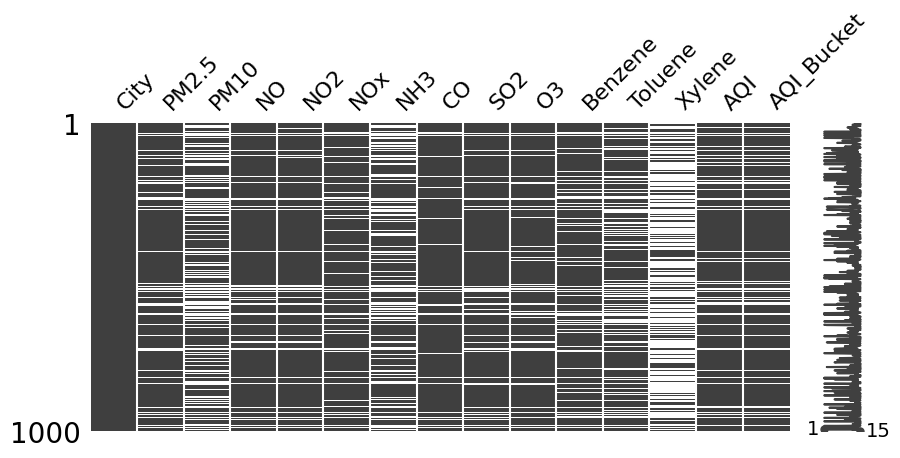

In [67]:
msno.matrix(city_day.sample(1000),figsize=(10,4))

In [68]:
# Imputation using ffill/pad
# Imputing Xylene value
city_day['Xylene'][52:62]
#city_day['Xylene'][52:62].plot()

Date
2015-02-22     8.47
2015-02-23    28.46
2015-02-24     6.05
2015-02-25     0.81
2015-02-26      NaN
2015-02-27      NaN
2015-02-28      NaN
2015-03-01     1.32
2015-03-02     0.22
2015-03-03     2.25
Name: Xylene, dtype: float64

Na coluna Xylene, há três valores ausentes (NaN). 

### Imputing using ffill

In [69]:
city_day1.fillna(method='ffill',inplace=True)
city_day1['Xylene'][52:62]
#city_day1['Xylene'][52:62].plot()

Date
2015-02-22     8.47
2015-02-23    28.46
2015-02-24     6.05
2015-02-25     0.81
2015-02-26     0.81
2015-02-27     0.81
2015-02-28     0.81
2015-03-01     1.32
2015-03-02     0.22
2015-03-03     2.25
Name: Xylene, dtype: float64

O valor 0.81 é usado para as posições futuras (foward) onde houver NaN 

### Imputation using bfill

In [70]:
# Imputing AQI value
city_day['AQI'][25:30]
#city_day['AQI'][:30].plot()

Date
2015-01-26      NaN
2015-01-27      NaN
2015-01-28      NaN
2015-01-29    209.0
2015-01-30    328.0
Name: AQI, dtype: float64

In [71]:
city_day1.fillna(method='bfill',inplace=True)
city_day1['AQI'][25:30]
#city_day1['AQI'][20:30].plot()

Date
2015-01-26    209.0
2015-01-27    209.0
2015-01-28    209.0
2015-01-29    209.0
2015-01-30    328.0
Name: AQI, dtype: float64

Os valores nos dias anteriores (backward) são preenchidos com 209.

### Imputação com método de interpolação linear

Nem sempre usar ffill or bffill é a melhor opção. Uma alternativa mais promissora é usar interpolação onde o comportamento geral da série é preservado.

[Linear interpolation](https://www.lexjansen.com/nesug/nesug01/ps/ps8026.pdf) é uma técnica de imputação que assume um relacionamento linear entre os pontos na série e usa valores vizinhos não nulos para calcular os valores ausentes. 

Para saber mais opções de interpolação, veja a documentação oficial do [pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html)

In [72]:
city_day['Xylene'][52:62]

Date
2015-02-22     8.47
2015-02-23    28.46
2015-02-24     6.05
2015-02-25     0.81
2015-02-26      NaN
2015-02-27      NaN
2015-02-28      NaN
2015-03-01     1.32
2015-03-02     0.22
2015-03-03     2.25
Name: Xylene, dtype: float64

In [73]:
# Interpolate using the linear method
city_day1= city_day.copy(deep=True)
city_day1.interpolate(limit_direction="both",inplace=True)
city_day1['Xylene'][52:62]
#city_day1['Xylene'][52:62].plot()

Date
2015-02-22     8.4700
2015-02-23    28.4600
2015-02-24     6.0500
2015-02-25     0.8100
2015-02-26     0.9375
2015-02-27     1.0650
2015-02-28     1.1925
2015-03-01     1.3200
2015-03-02     0.2200
2015-03-03     2.2500
Name: Xylene, dtype: float64

## Técnicas Avançadas de Imputação 

Técnicas avançadas de imputação utilizam algoritmos de aprendizagem de máquina. A seguir veremos as seguintes técnicas:

* [Nearest neighbors imputation](https://scikit-learn.org/stable/modules/impute.html#nearest-neighbors-imputation)
* [Multivariate feature imputation](https://scikit-learn.org/stable/modules/impute.html#multivariate-feature-imputation)

### Imputação com K-Vizinhos mais próximos (K-Nearest Neighbor) 

A classe [KNNImputer](https://scikit-learn.org/stable/modules/impute.html#multivariate-feature-imputation) usa k-Vizinhos mais próximos para obter uma média dos valores. A média pode usar pesos uniformes ou ponderados por distancia.

In [74]:
from sklearn.impute import KNNImputer

titanic_knn = titanic_df.copy(deep=True)

knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
titanic_knn['Age'] = knn_imputer.fit_transform(titanic_knn[['Age']])

In [75]:
titanic_knn['Age'].isnull().sum()


0

### Imputação multivariável: Multivariate Imputation by Chained Equations (MICE)

A estratégia MICE modela cada coluna com valores ausentes como uma funções de outras colunas. Ele realiza várias regressões e usa o valor médio estimado para substituir os valores ausentes.



In [76]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

titanic_mice = titanic_df.copy(deep=True)

mice_imputer = IterativeImputer()
titanic_mice['Age'] = mice_imputer.fit_transform(titanic_mice[['Age']])

In [77]:
titanic_mice['Age'].isnull().sum()

0

# Algoritmos que suportam valores ausentes

Alguns algoritmos como o XGBost e o LightGBM podem trabalhar com valores ausentes sem necessidade de pré-processamento. Basta informá-los através de parâmetros. 

* [XGBoost](https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn)
![](https://imgur.com/GNlcWoJ.png)

* [LightGBm](https://lightgbm.readthedocs.io/en/latest/Advanced-Topics.html)
![](https://imgur.com/GVdcx7h.png)

# Conclusão

Não há um método único para tratar valores ausentes. Experimente diferentes abordagens e veja o que é mais adequado para cada problema em particular.

# Referências 

* [Dealing with Missing Data in Python](https://campus.datacamp.com/courses/dealing-with-missing-data-in-python/the-problem-with-missing-data?ex=1)
* [How to Handle Missing Data](https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4)